In [2]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/c1/8b/5fe2cc11fee489817272089c4203e679c63b570a5aaeb18d852ae3cbba6a/et_xmlfile-2.0.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("dataset/dataset.xlsx")

# Save as CSV
df.to_csv("final_dataset.csv", index=False)


In [4]:
import pandas as pd

# Load dataset from .parquet file
df = pd.read_csv("dataset/final_dataset.csv")

# Display first few rows
print(df.head())


                    description  score
0                 grinning face   1.00
1  smiling face with open mouth   1.00
2                  winking face   1.00
3                    robot face   0.50
4              father christmas   0.75


In [5]:
print(df.info())  # Summary of dataset
print(df.describe())  # Statistics for numerical columns
print(df.columns)  # List of column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  2749 non-null   object 
 1   score        2749 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.1+ KB
None
             score
count  2749.000000
mean      0.636595
std       0.233991
min       0.000000
25%       0.500000
50%       0.500000
75%       0.750000
max       1.000000
Index(['description', 'score'], dtype='object')


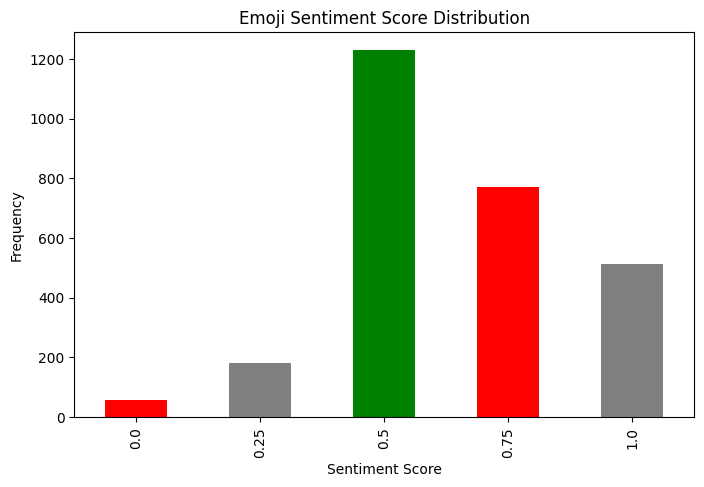

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("dataset/final_dataset.csv")  # Replace with your actual file name

# Plot sentiment score distribution
plt.figure(figsize=(8, 5))
df["score"].value_counts().sort_index().plot(kind="bar", color=["red", "gray", "green"])

# Set labels and title
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Emoji Sentiment Score Distribution")

# Show the plot
plt.show()


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dataset/final_dataset.csv")  # Replace with your actual file name

# Count the number of emojis for each sentiment score
emoji_counts = df["score"].value_counts().sort_index()

# Display the counts
print(emoji_counts)


score
0.00      57
0.25     180
0.50    1228
0.75     772
1.00     512
Name: count, dtype: int64


In [8]:
pd.read_parquet("dataset/train-00000-of-00001-38cc4fa96c139e86.parquet")

,image,text
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,grinning face
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,smiling face with open mouth
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,winking face
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,robot face
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,father christmas
...,...,...
2744,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,baby angel
2745,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,baby angel
2746,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,baby angel
2747,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,baby angel


In [9]:
import pandas as pd

# Load CSV dataset (which has sentiment scores)
csv_df = pd.read_csv("dataset/final_dataset.csv")

# Load Parquet dataset (which has images)
parquet_df = pd.read_parquet("dataset/train-00000-of-00001-38cc4fa96c139e86.parquet")

# Check column names
print(csv_df.columns)
print(parquet_df.columns)


Index(['description', 'score'], dtype='object')
Index(['image', 'text'], dtype='object')


In [10]:
# Merge CSV and Parquet datasets
merged_df = pd.merge(parquet_df, csv_df, left_on="text", right_on="description", how="left")

# Drop duplicate 'description' column after merging
merged_df.drop(columns=["description"], inplace=True)

# Show merged dataset
print(merged_df.head())


                                               image  \
0  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
1  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
2  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
3  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
4  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   

                           text  score  
0                 grinning face   1.00  
1  smiling face with open mouth   1.00  
2                  winking face   1.00  
3                    robot face   0.50  
4              father christmas   0.75  


# Convert Base64/Bytes Images to NumPy Arrays

In [12]:
print(type(merged_df["image"].iloc[0]))  # Check the first image type


<class 'dict'>


In [13]:
print(merged_df["image"].iloc[0].keys())  # See what keys are inside


dict_keys(['bytes', 'path'])


In [14]:
def extract_image_data(image_dict):
    """Extracts image bytes from dictionary format."""
    if isinstance(image_dict, dict):
        return image_dict.get("image_data", None)  # Adjust key based on actual structure
    return image_dict  # If already in correct format

# Apply extraction
merged_df["image"] = merged_df["image"].apply(extract_image_data)


In [15]:
import io
import numpy as np
from PIL import Image
import base64

def decode_image(image_data):
    """Convert base64/byte image to NumPy array."""
    if isinstance(image_data, bytes):
        img = Image.open(io.BytesIO(image_data))
    else:
        img = Image.open(io.BytesIO(base64.b64decode(image_data)))

    img = img.resize((64, 64))  # Resize for CNN
    img = np.array(img) / 255.0  # Normalize
    return img

# Apply transformation
merged_df["image"] = merged_df["image"].apply(decode_image)

# Convert to NumPy arrays
X = np.stack(merged_df["image"].values)  # Image data
y = merged_df["score"].values            # Sentiment scores

print(X.shape, y.shape)  # Verify dimensions


TypeError: argument should be a bytes-like object or ASCII string, not 'NoneType'

In [16]:
print(merged_df["image"].isna().sum())  # Count missing images
print(merged_df["image"].dtype)  # Check the data type


5869
object


In [17]:
print(merged_df["image"].head(10))
print(type(merged_df["image"].iloc[0]))  # Check the first image type


0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: image, dtype: object
<class 'NoneType'>


In [18]:
print(parquet_df.head(10))  # Check the first 10 rows of your Parquet dataset
print(parquet_df.dtypes)    # Check the data types of all columns


                                               image  \
0  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
1  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
2  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
3  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
4  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
5  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
6  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
7  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
8  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
9  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   

                           text  
0                 grinning face  
1  smiling face with open mouth  
2                  winking face  
3                    robot face  
4              father christmas  
5              father christmas  
6              father christmas  
7              father christmas  
8              father christmas  
9              mother christmas  
image    

In [20]:
import io
import numpy as np
import pandas as pd
from PIL import Image

# Function to decode image bytes from dictionary
def decode_image(image_dict):
    if isinstance(image_dict, dict) and "bytes" in image_dict:
        try:
            img = Image.open(io.BytesIO(image_dict["bytes"]))  # Open image from bytes
            img = img.resize((64, 64))  # Resize for model compatibility
            img = np.array(img) / 255.0  # Normalize pixel values (0-1)
            return img
        except Exception as e:
            print(f"Error decoding image: {e}")
            return np.zeros((64, 64, 3))  # Return a blank image if decoding fails
    return np.zeros((64, 64, 3))  # Handle missing images

# Load Parquet dataset
parquet_df = pd.read_parquet("dataset/train-00000-of-00001-38cc4fa96c139e86.parquet", engine="pyarrow")

# Apply function to extract images
parquet_df["image"] = parquet_df["image"].apply(decode_image)

# Convert images into a NumPy array for model training
X = np.stack(parquet_df["image"].values)  # Image data
y = parquet_df["text"].values             # Labels (emoji descriptions)

print(f"Dataset Shape: {X.shape}, Labels Shape: {y.shape}")


Dataset Shape: (2749, 64, 64, 3), Labels Shape: (2749,)


In [21]:
csv_df = pd.read_csv("dataset/final_dataset.csv")
merged_df = pd.merge(parquet_df, csv_df, left_on="text", right_on="description", how="inner")


In [23]:
import io
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Function to decode image bytes from dictionary
def decode_image(image_dict):
    if isinstance(image_dict, dict) and "bytes" in image_dict:
        try:
            img = Image.open(io.BytesIO(image_dict["bytes"]))  # Open image
            img = img.resize((64, 64))  # Resize for CNN
            img = np.array(img) / 255.0  # Normalize (0-1)
            return img
        except Exception as e:
            print(f"Error decoding image: {e}")
            return np.zeros((64, 64, 3))  # Blank image if error
    return np.zeros((64, 64, 3))

# Load datasets
parquet_df = pd.read_parquet("dataset/train-00000-of-00001-38cc4fa96c139e86.parquet", engine="pyarrow")
csv_df = pd.read_csv("dataset/final_dataset.csv")

# Merge datasets based on emoji description
merged_df = pd.merge(parquet_df, csv_df, left_on="text", right_on="description", how="inner")

# Apply function to extract images
merged_df["image"] = merged_df["image"].apply(decode_image)

# Convert to NumPy arrays
X = np.stack(merged_df["image"].values)  # Image data
y = merged_df["score"].values            # Sentiment scores

# One-hot encode sentiment scores
y = to_categorical(y, num_classes=5)

# Split dataset into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Training Data: (4695, 64, 64, 3), Testing Data: (1174, 64, 64, 3)


# 
Since you have images with a size of (64, 64, 3), we’ll use a Convolutional Neural Network (CNN) with 3 convolutional layers and a softmax output layer for 5 sentiment classes (0, 0.25, 0.5, 0.75, 1).

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(5, activation="softmax")  # 5 sentiment classes
])

# Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print Model Summary
model.summary()


/var/home/ujjain/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-12 22:39:09.755696: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,845 (2.61 MB)

 Trainable params: 683,845 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Train CNN model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.8259 - loss: 0.4953 - val_accuracy: 0.9089 - val_loss: 0.2531
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9139 - loss: 0.2326 - val_accuracy: 0.9225 - val_loss: 0.1865
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9413 - loss: 0.1711 - val_accuracy: 0.9608 - val_loss: 0.1211
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9543 - loss: 0.1284 - val_accuracy: 0.9676 - val_loss: 0.1089
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9703 - loss: 0.0905 - val_accuracy: 0.9761 - val_loss: 0.0853
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9642 - loss: 0.0975 - val_accuracy: 0.9770 - val_loss: 0.0782
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9752 - loss: 0.0647 - val_accuracy: 0.9761 - val_loss: 0.0781
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9805 - loss: 0.0571 - val_accu

In [31]:
# Save the trained model
model.save("emoji_sentiment_model.h5")  # Saves in HDF5 format
print("Model saved successfully!")


Model saved successfully!


In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("emoji_sentiment_model.h5")  # Change filename if different

def predict_emoji_sentiment(png_file, model):
    """Loads a PNG emoji image and predicts its sentiment using CNN."""
    try:
        # Load image and preprocess
        img = image.load_img(png_file, target_size=(64, 64))  # Resize
        img_array = image.img_to_array(img) / 255.0  # Normalize (0-1)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict sentiment
        predictions = model.predict(img_array)
        predicted_index = np.argmax(predictions)  # Get highest probability class

        # Define sentiment classes
        sentiment_classes = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

        return sentiment_classes[predicted_index], predictions[0]
    
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Example usage:
emoji_image = "laughing.jpg"  # Provide your PNG emoji file path
sentiment_label, sentiment_scores = predict_emoji_sentiment(emoji_image, model)

print(f"Predicted Sentiment: {sentiment_label}")
print(f"Sentiment Scores: {sentiment_scores}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Sentiment: Negative
Sentiment Scores: [2.3947980e-03 9.9760520e-01 2.0990184e-12 4.0451903e-13 3.6604408e-13]


In [30]:
def predict_sentiment(emoji_text, model):
    """Converts a text emoji to an image and predicts sentiment using CNN model."""
    img = text_emoji_to_image(emoji_text)
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Get predictions
    predictions = model.predict(img)
    predicted_index = np.argmax(predictions)

    # Define sentiment classes
    sentiment_classes = [0, 0.25, 0.5, 0.75, 1]
    return sentiment_classes[predicted_index]

# Example usage:
emoji_sentiment = predict_sentiment("😂", model)
print("Predicted Sentiment:", emoji_sentiment)


Error generating image from emoji: 'ImageDraw' object has no attribute 'textsize'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Sentiment: 0


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)

# Fit on training data
datagen.fit(X_train)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(64, 64, 3)),
    BatchNormalization(),  # Normalize activations
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),  # Reduce overfitting
    Dense(5, activation="softmax")  # 5 sentiment classes
])

# Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [36]:
# Train using augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=30)


Epoch 1/30


/var/home/ujjain/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.7703 - loss: 1.1373 - val_accuracy: 0.8007 - val_loss: 0.4712
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.8587 - loss: 0.3889 - val_accuracy: 0.8578 - val_loss: 0.3655
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.8854 - loss: 0.3150 - val_accuracy: 0.8739 - val_loss: 0.3101
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.8767 - loss: 0.3294 - val_accuracy: 0.8271 - val_loss: 0.3773
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.8899 - loss: 0.2928 - val_accuracy: 0.9097 - val_loss: 0.2832
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.8882 - loss: 0.2671 - val_accuracy: 0.9029 - val_loss: 0.2506
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.8921 - loss: 0.2688 - val_accuracy: 0.9208 - val_loss: 0.2243
Epoch 8/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.8924 - loss: 0.2604 - val_accurac

In [37]:
# Save the trained model
model.save("emoji_image_model.h5")  # Saves in HDF5 format
print("Model saved successfully!")


Model saved successfully!


In [41]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("emoji_image_model.h5")  # Change filename if different

def predict_emoji_sentiment(png_file, model):
    """Loads a PNG emoji image and predicts sentiment scores using CNN."""
    try:
        # Load image and preprocess
        img = image.load_img(png_file, target_size=(64, 64))  # Resize
        img_array = image.img_to_array(img) / 255.0  # Normalize (0-1)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict sentiment scores
        predictions = model.predict(img_array)  # Array of probabilities
        avg_sentiment_score = np.mean(predictions[0])  # Compute average score

        return avg_sentiment_score, predictions[0]  # Return avg score & raw scores
    
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Example usage:
emoji_image = "heart_image.png"  # Provide your PNG emoji file path
avg_score, sentiment_scores = predict_emoji_sentiment(emoji_image, model)

print(f"Average Sentiment Score: {avg_score:.4f}")
print(f"Sentiment Scores: {sentiment_scores}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Average Sentiment Score: 0.2000
Sentiment Scores: [9.4963270e-01 5.0367337e-02 1.0063820e-13 3.0436198e-20 1.7318827e-19]


In [43]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("emoji_image_model.h5")  # Change filename if different

def text_to_image(emoji_text, image_size=(64, 64), font_size=50):
    """Converts an emoji text to an image."""
    try:
        # Create blank image (white background)
        img = Image.new("RGB", image_size, (255, 255, 255))
        draw = ImageDraw.Draw(img)

        # Load font (adjust path if needed)
        try:
            font = ImageFont.truetype("arial.ttf", font_size)  # Windows
        except:
            font = ImageFont.load_default()  # Use default if font not found

        # Get text size and center it
        text_width, text_height = draw.textsize(emoji_text, font=font)
        position = ((image_size[0] - text_width) // 2, (image_size[1] - text_height) // 2)

        # Draw emoji text
        draw.text(position, emoji_text, fill=(0, 0, 0), font=font)

        return img

    except Exception as e:
        print(f"Error creating image: {e}")
        return None

def predict_emoji_sentiment_from_text(emoji_text, model):
    """Converts emoji text to image, preprocesses it, and predicts sentiment."""
    # Convert text emoji to image
    img = text_to_image(emoji_text)

    if img is None:
        print("Error: Could not generate emoji image.")
        return None

    # Preprocess image for model
    img = img.resize((64, 64))  # Resize
    img_array = image.img_to_array(img) / 255.0  # Normalize (0-1)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict sentiment scores
    predictions = model.predict(img_array)
    avg_sentiment_score = np.mean(predictions[0])  # Compute average score

    return avg_sentiment_score, predictions[0]

# Example usage:
emoji_text = "😂"  # Provide emoji as text
avg_score, sentiment_scores = predict_emoji_sentiment_from_text(emoji_text, model)

print(f"Average Sentiment Score: {avg_score:.4f}")
print(f"Sentiment Scores: {sentiment_scores}")


Error creating image: 'ImageDraw' object has no attribute 'textsize'
Error: Could not generate emoji image.


TypeError: cannot unpack non-iterable NoneType object